# Brief introduction to NLTK

NLTK (the Natural Language Toookit) is a collection of Python libraries for processing text. Tokenizers, word-stemmers and lemmatizers, part-of-speech taggers, and many other tools are defined. 

* **Website**: https://www.nltk.org/ 
* **Free book**: 	Steven Bird, Ewan Klein, and Edward Loper. *Natural Language Processing with Python -- Analyzing Text with the Natural Language Toolkit*. https://www.nltk.org/book/

In [68]:
import string
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt

### Some helpful functions

In [88]:
def read_file(f, lower=True):
    """Simple wrapper to read a file."""
    with open(f) as reader:
        text = reader.read()
        if lower:
            return text.lower()
        return text

def get_tokens(text):
    tokens= text.split()
    return cleanup(tokens)
    
def cleanup(tokens):
    """Use some basic python to clean up tokens.
    stopwords, punctuation, digits are removed."""
    stop = stopwords.words('english')
    toremove = string.punctuation + "0123456789" + string.whitespace
    tab = "".maketrans("", "", toremove)
    tokens = [t.translate(tab) for t in tokens]
    return remove_tokens(tokens, stop)
    
def word_frequency(tokens):
    """Plot the most common tokens in the text.
    The distribution is returned."""
    dist = nltk.FreqDist(tokens)
    dist.plot(25, cumulative=False)
    return dist

def sort_dist(dist):
    return sorted(dist.items(), key=lambda x: x[1], reverse=True)

def remove_tokens(tokens, stopwords):
    """Takes a list of tokens and returns a list with provided stopwords removed."""
    return [t for t in tokens if t not in stopwords]

### Tokenize a file and plot word frequencies

This uses Python string methods to tokenize a file and remove unwanted tokens. Afterwards, NLTK is used to plot word frequencies.

In [89]:
def word_tokenization_1(text):
    """Tokenize a string using split and use NLTK to compute word frequencies.
    A sorted list of pairs is returned (descending order of frequency).
    """
    tokens = get_tokens(text)
    dist = word_frequency(tokens)
    return sort_dist(dist)

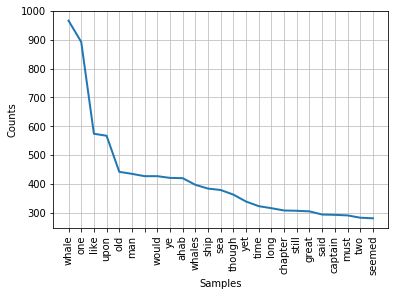

whale	966
one	892
like	574
upon	567
old	442
man	435
	427
would	427
ye	421
ahab	420
whales	397
ship	384
sea	379
though	363
yet	339
time	323
long	316
chapter	308
still	307
great	305
said	294
captain	293
must	291
two	283
seemed	281


In [90]:
moby = "c:/test/moby_dick.txt"
moby_text = read_file(moby)

freq = word_tokenization_1(moby_text)
for i in range(25):
    print(f'{freq[i][0]}\t{freq[i][1]}')

## NLTK Tokenizers

NLTK has tokenizers for splitting text into sentences (based on capitalization and punctuation) and into words. 

In [91]:
def sentence_tokenization_exp(text):
    """Split text into sentences using NLTK sentence tokenizer.
    Print out 10 sentences, starting at index 1000. 
    """
    sentences = sent_tokenize(text)
    for i in range(1000, 1010):
        print(f'<{sentences[i]}>')

In [92]:
sentence_tokenization_exp(moby_text)

<it needs scarcely to be told, with what feelings, on the eve of a
nantucket voyage, i regarded those marble tablets, and by the murky
light of that darkened, doleful day read the fate of the whalemen who
had gone before me.>
<yes, ishmael, the same fate may be thine.>
<but
somehow i grew merry again.>
<delightful inducements to embark, fine
chance for promotion, it seems—aye, a stove boat will make me an
immortal by brevet.>
<yes, there is death in this business of whaling—a
speechlessly quick chaotic bundling of a man into eternity.>
<but what
then?>
<methinks we have hugely mistaken this matter of life and death.>
<methinks that what they call my shadow here on earth is my true
substance.>
<methinks that in looking at things spiritual, we are too
much like oysters observing the sun through the water, and thinking
that thick water the thinnest of air.>
<methinks my body is but the lees
of my better being.>


In [93]:
def word_tokenization_2(sent):
    """Split text into sentences using NLTK sentence tokenizer.
    Print out 10 sentences, starting at index 1000. 
    """
    words = word_tokenize(sent)
    for w in words:
        print(f'<{w}>')

In [94]:
word_tokenization_2("The number 1 comes after 0.5.")

<The>
<number>
<1>
<comes>
<after>
<0.5>
<.>


Compare this to our earlier method of tokenization.

In [95]:
tokens = get_tokens("The number 1 comes after 0.5.")
for w in tokens:
    print(f'<{w}>')

<The>
<number>
<>
<comes>
<>


### Using wordnet synsets

In [96]:
def wordnet_exp(text):
    """Wordnet synsets
    """
    tokens= text.split()
    tokens = cleanup(tokens)
    dist = nltk.FreqDist(tokens)
    sort = sort_dist(dist)
    for i in range(10):
        tok = sort[i][0]
        syns = wordnet.synsets(tok)
        print(tok)
        for syn in syns:
            print(f'\t{syn.definition()}')

In [98]:
wordnet_exp(moby_text)

whale
	a very large person; impressive in size or qualities
	any of the larger cetacean mammals having a streamlined body and breathing through a blowhole on the head
	hunt for whales
one
	the smallest whole number or a numeral representing this number
	a single person or thing
	used of a single unit or thing; not two or more
	having the indivisible character of a unit
	of the same kind or quality
	used informally as an intensifier
	indefinite in time or position
	being a single entity made by combining separate components
	eminent beyond or above comparison
like
	a similar kind
	a kind of person
	prefer or wish to do something
	find enjoyable or agreeable
	be fond of
	feel about or towards; consider, evaluate, or regard
	want to have
	resembling or similar; having the same or some of the same characteristics; often used in combination
	equal in amount or value
	having the same or similar characteristics
	conforming in every respect
upon
old
	past times (especially in the phrase `in da

## Stemming

In [101]:
def stemmer_exp(text):
    """Using a Porter Stemmer
    """
    tokens= text.split()
    stemmer = PorterStemmer()
    stemmed = [(tok,stemmer.stem(tok)) for tok in tokens]
    for (tok,ste) in stemmed:
        print(f'{tok}\t->\t{ste}')

In [107]:
text = "run running ran jump jumping jumper jumped big bigger biggest bigly compile compiler compiling"
stemmer_exp(text)

run	->	run
running	->	run
ran	->	ran
jump	->	jump
jumping	->	jump
jumper	->	jumper
jumped	->	jump
big	->	big
bigger	->	bigger
biggest	->	biggest
bigly	->	bigli
compile	->	compil
compiler	->	compil
compiling	->	compil


## Lemmatizer

In [118]:
def lemmatizer_exp(text):
    """Using a WordNetLemmatizer
    """
    tokens= text.split()
    pos = ['n', 'v', 'a', 'r']
    lem = WordNetLemmatizer()    
    for p in pos:
        print(p)
        print('-'*30)
        lemmatized = [(tok,lem.lemmatize(tok,pos=p)) for tok in tokens]
        for (tok,ste) in lemmatized:
            X = 'X'
            if tok == ste:
                X = ''
            print(f'{X}\t{tok}\t->\t{ste}')

In [121]:
text = "run runs running ran, tall tallest quick quickest quickly"
lemmatizer_exp(text)

n
------------------------------
	run	->	run
X	runs	->	run
	running	->	running
	ran,	->	ran,
	tall	->	tall
	tallest	->	tallest
	quick	->	quick
	quickest	->	quickest
	quickly	->	quickly
v
------------------------------
	run	->	run
X	runs	->	run
X	running	->	run
	ran,	->	ran,
	tall	->	tall
	tallest	->	tallest
	quick	->	quick
	quickest	->	quickest
	quickly	->	quickly
a
------------------------------
	run	->	run
	runs	->	runs
	running	->	running
	ran,	->	ran,
	tall	->	tall
X	tallest	->	tall
	quick	->	quick
X	quickest	->	quick
	quickly	->	quickly
r
------------------------------
	run	->	run
	runs	->	runs
	running	->	running
	ran,	->	ran,
	tall	->	tall
	tallest	->	tallest
	quick	->	quick
	quickest	->	quickest
	quickly	->	quickly


### Part of Speech Tagging

In [139]:
tokens = word_tokenize("The very first run was unsuccessful. ")
tagged = nltk.pos_tag(tokens)
for pair in tagged:
    print(pair)
    nltk.help.upenn_tagset(pair[1])

('The', 'DT')
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
('very', 'RB')
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
('first', 'JJ')
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
('run', 'NN')
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
('was', 'VBD')
VBD: verb, past tense
    dipped pleaded swiped regummed soaked tidied convened halted registered
    cushioned exacted snubbed strode aimed adopted belied figgered
    speculat

In [141]:
tokens = word_tokenize("3.14 is a real number, and so is 3e14.")
tagged = nltk.pos_tag(tokens)
for pair in tagged:
    print(pair)
    nltk.help.upenn_tagset(pair[1])

('3.14', 'CD')
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
('is', 'VBZ')
VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...
('a', 'DT')
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
('real', 'JJ')
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
('number', 'NN')
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed therm

In [140]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or